In [1]:
import sys
import os
import torch
import numpy as np
import pandas as pd

In [5]:
k562_data = torch.load("/home/justinhong/data/k562-100.pt")

In [6]:
k562_data

{'expression_matrix': array([[0.        , 4.116087  , 1.6989243 , ..., 2.0414922 , 3.9585767 ,
         1.1737294 ],
        [0.        , 4.264735  , 0.7240735 , ..., 0.7240735 , 4.1708293 ,
         0.        ],
        [0.53746116, 4.0835495 , 1.1426188 , ..., 0.885135  , 3.825033  ,
         0.53746116],
        ...,
        [0.        , 3.445676  , 1.7846454 , ..., 1.7846454 , 3.5217388 ,
         0.4822307 ],
        [0.        , 3.8232505 , 1.7644103 , ..., 0.        , 4.078512  ,
         0.        ],
        [0.        , 3.347689  , 1.6845286 , ..., 0.        , 3.7015288 ,
         0.7407354 ]], dtype=float32),
 'interventions': ['ENSG00000117360',
  'ENSG00000164134',
  'ENSG00000135775',
  'excluded',
  'ENSG00000180992',
  'ENSG00000058729',
  'ENSG00000115884',
  'ENSG00000103549',
  'ENSG00000072849',
  'ENSG00000198755',
  'ENSG00000148297',
  'ENSG00000154473',
  'ENSG00000116560',
  'non-targeting',
  'ENSG00000085840',
  'ENSG00000102978',
  'ENSG00000087365',
  'ENSG0

In [7]:
k562_data["expression_matrix"].shape

(130200, 622)

In [15]:
len(np.unique(k562_data["interventions"]))

641

In [18]:
# rename all excluded and missing interventions as observational
gene_names = k562_data["gene_names"]
orig_interventions = np.array(k562_data["interventions"], dtype="object")
perturbation_label = orig_interventions.copy()
for intervention in np.unique(k562_data["interventions"]):
    if intervention in ("non-targeting", "excluded") or intervention not in gene_names:
        perturbation_label[orig_interventions == intervention] = "obs"
        

In [26]:
X_df = pd.DataFrame(np.hstack((k562_data["expression_matrix"], perturbation_label.reshape((-1, 1)))), columns = gene_names + ["perturbation_label"])
X_df

,ENSG00000116809,ENSG00000142676,ENSG00000188529,ENSG00000133226,ENSG00000090273,ENSG00000142784,ENSG00000117748,ENSG00000126698,ENSG00000180198,ENSG00000116560,...,ENSG00000101901,ENSG00000125352,ENSG00000101882,ENSG00000125676,ENSG00000134597,ENSG00000147274,ENSG00000102030,ENSG00000147403,ENSG00000071553,perturbation_label
0,0.0,4.116087,1.698924,2.041492,0.750007,0.0,1.173729,1.173729,0.0,2.041492,...,0.0,0.0,0.750007,0.750007,0.0,1.470416,2.041492,3.958577,1.173729,ENSG00000117360
1,0.0,4.264735,0.724074,1.139639,1.432333,0.724074,0.0,0.724074,0.0,1.842785,...,0.0,0.0,0.0,1.432333,0.0,1.432333,0.724074,4.170829,0.0,ENSG00000164134
2,0.537461,4.083549,1.142619,0.885135,2.002142,0.0,0.0,1.347196,0.885135,2.327426,...,0.537461,0.0,0.885135,1.142619,0.0,1.516945,0.885135,3.825033,0.537461,ENSG00000135775
3,0.581381,4.184453,0.581381,0.0,0.946631,0.0,0.581381,1.213582,0.581381,1.597878,...,0.0,0.0,0.0,0.0,0.0,0.581381,0.0,2.488159,0.0,obs
4,0.0,3.70225,1.201707,1.731935,1.731935,0.0,0.771447,0.771447,0.0,1.731935,...,0.771447,0.0,0.771447,1.731935,0.771447,2.076608,0.0,3.861062,0.0,ENSG00000180992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130195,0.0,3.652522,1.166304,2.03213,1.875682,0.0,0.744341,1.690135,0.744341,2.286499,...,0.0,0.0,0.0,1.690135,1.166304,1.462135,1.166304,3.904441,0.0,ENSG00000149636
130196,0.0,3.758051,1.870334,0.863993,1.870334,0.0,1.118063,1.118063,0.522541,2.223076,...,0.0,0.0,0.0,0.522541,0.863993,1.758574,1.320483,3.906565,0.0,ENSG00000164151
130197,0.0,3.445676,1.784645,1.410601,2.331683,0.0,0.0,1.674811,1.050489,1.883602,...,0.0,0.0,0.806193,1.410601,0.482231,1.551406,1.784645,3.521739,0.482231,ENSG00000008988
130198,0.0,3.823251,1.76441,2.247783,1.229367,0.0,0.0,1.532254,0.0,2.368022,...,0.792781,0.792781,0.792781,1.229367,0.0,0.792781,0.0,4.078512,0.0,ENSG00000029364


In [27]:
X_df.to_csv("/home/justinhong/data/cleaned_k562.csv")

## Run SDCI

In [1]:
import sys
import os
import torch
import numpy as np
import pandas as pd

In [2]:
X_df = pd.read_csv("/home/justinhong/data/cleaned_k562.csv", index_col=0)
X_df.head()

,ENSG00000116809,ENSG00000142676,ENSG00000188529,ENSG00000133226,ENSG00000090273,ENSG00000142784,ENSG00000117748,ENSG00000126698,ENSG00000180198,ENSG00000116560,...,ENSG00000101901,ENSG00000125352,ENSG00000101882,ENSG00000125676,ENSG00000134597,ENSG00000147274,ENSG00000102030,ENSG00000147403,ENSG00000071553,perturbation_label
0,0.000000,4.116087,1.698924,2.041492,0.750007,0.000000,1.173729,1.173729,0.000000,2.041492,...,0.000000,0.0,0.750007,0.750007,0.000000,1.470416,2.041492,3.958577,1.173729,ENSG00000117360
1,0.000000,4.264735,0.724074,1.139639,1.432333,0.724074,0.000000,0.724074,0.000000,1.842785,...,0.000000,0.0,0.000000,1.432333,0.000000,1.432333,0.724074,4.170829,0.000000,ENSG00000164134
2,0.537461,4.083549,1.142619,0.885135,2.002142,0.000000,0.000000,1.347196,0.885135,2.327426,...,0.537461,0.0,0.885135,1.142619,0.000000,1.516945,0.885135,3.825033,0.537461,ENSG00000135775
3,0.581381,4.184453,0.581381,0.000000,0.946631,0.000000,0.581381,1.213582,0.581381,1.597878,...,0.000000,0.0,0.000000,0.000000,0.000000,0.581381,0.000000,2.488159,0.000000,obs
4,0.000000,3.702250,1.201707,1.731935,1.731935,0.000000,0.771447,0.771447,0.000000,1.731935,...,0.771447,0.0,0.771447,1.731935,0.771447,2.076608,0.000000,3.861062,0.000000,ENSG00000180992


In [3]:
sys.path.append("../")
from models import SDCI
from train_utils import create_intervention_dataset

import wandb

In [4]:
dataset = create_intervention_dataset(X_df, regime_format=False)

In [5]:
model = SDCI()

In [6]:
model.train(dataset, log_wandb=True, wandb_project="cb-perturb-seq", stage1_kwargs=dict(n_epochs=200, n_epochs_check=10), stage2_kwargs=dict(n_epochs=1, n_epochs_check=10))
print(f"Ran in {model._train_runtime_in_sec // 60} minutes.")

# adj_mtx = model.get_adjacency_matrix()
# np.savetext("/home/justinhong/results/cb_perturb_seq_adj_mtx.csv", adj_mtx, delimiter=",")

wandb: Currently logged in as: justinhong (azizi-causal-perturb). Use `wandb login --relogin` to force relogin


Epoch 0: loss=239.94, gamma=0.00
Epoch 10: loss=146.82, gamma=0.00
Epoch 20: loss=146.58, gamma=0.00
Epoch 30: loss=146.52, gamma=0.00
Epoch 40: loss=146.52, gamma=0.00
Epoch 50: loss=146.49, gamma=0.00
Epoch 60: loss=146.48, gamma=0.00
Epoch 70: loss=146.48, gamma=0.00
Epoch 80: loss=146.47, gamma=0.00
Epoch 90: loss=146.47, gamma=0.00
Epoch 100: loss=146.49, gamma=0.00
Epoch 110: loss=146.49, gamma=0.00
Epoch 120: loss=146.47, gamma=0.00
Epoch 130: loss=146.49, gamma=0.00
Epoch 140: loss=146.49, gamma=0.00
Epoch 150: loss=146.48, gamma=0.00
Epoch 160: loss=146.48, gamma=0.00
Epoch 170: loss=146.49, gamma=0.00
Epoch 180: loss=146.48, gamma=0.00
Epoch 190: loss=146.46, gamma=0.00
Fraction of possible edges in mask: 0.0002558906545631249
Epoch 0: loss=170.46, gamma=0.00
Finished training in 1768.9840545654297 seconds.
Ran in 29.0 minutes.


In [10]:
ps_adj = model._ps_model.get_adjacency_matrix().detach().numpy()
np.save("/home/justinhong/results/cb_perturb_seq_ps_adj_mtx.npy", ps_adj)

In [11]:
ps_adj = np.load("/home/justinhong/results/cb_perturb_seq_ps_adj_mtx.npy")

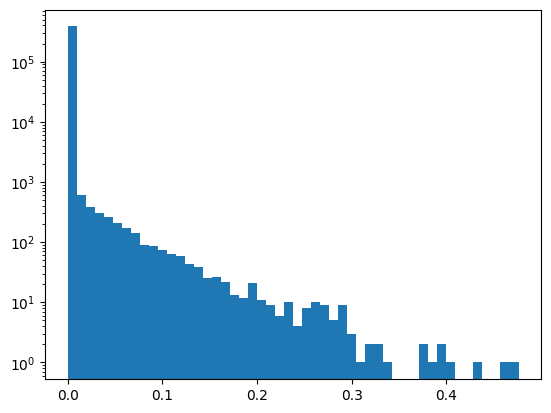

In [12]:
import matplotlib.pyplot as plt
plt.hist(ps_adj.flatten(), bins=50)
plt.yscale('log')

In [21]:
mask_threshold = 1e-3
d = dataset[0][0].shape[0]
print(f"Average num parents per feat in mask: {(ps_adj > mask_threshold).sum() / d}")

Average num parents per feat in mask: 305.85691318327974


In [22]:
from typing import Optional
import time

from modules import AutoEncoderLayers
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from models._sdci import _train

_DEFAULT_STAGE2_KWARGS = {
    "learning_rate": 2e-2,
    "n_epochs": 2_000,
    "alpha": 5e-3,
    "max_gamma": 300,
    "beta": 5e-3,
    "freeze_gamma_at_dag": True,
    "freeze_gamma_threshold": 0.5,
    "threshold": 0.3,
    "n_epochs_check": 100,
    "dag_penalty_flavor": "scc",
}

def train_from_mask(self,
        dataset: Dataset,
        mask: np.ndarray,
        batch_size: int = 512,
        log_wandb: bool = False,
        wandb_project: str = "SDCI",
        wandb_config_dict: Optional[dict] = None,
        B_true: Optional[np.ndarray] = None,
        stage2_kwargs: Optional[dict] = None,
        verbose: bool = False,):
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    sample_batch = next(iter(dataloader))
    assert len(sample_batch) == 2, "Dataset should contain (X, intervention_labels)"
    d = sample_batch[0].shape[1]

    self._stage2_kwargs = {**_DEFAULT_STAGE2_KWARGS.copy(), **(stage2_kwargs or {})}

    self.threshold = self._stage2_kwargs["threshold"]
    
    if log_wandb:
        wandb_config_dict = wandb_config_dict or {}
        wandb.init(
            project=wandb_project,
            name="SDCI",
            config={
                "batch_size": batch_size,
                "stage1_kwargs": self._stage1_kwargs,
                "stage2_kwargs": self._stage2_kwargs,
                **wandb_config_dict,
            },
        )

    start = time.time()
    if B_true is not None:
        print(
            f"Recall of mask: {(B_true.astype(bool) & mask.astype(bool)).sum() / B_true.sum()}"
        )
    print(
        f"Fraction of possible edges in mask: {mask.sum() / (mask.shape[0] * mask.shape[1])}"
    )

    # Begin DAG training
    dag_penalty_flavor = self._stage2_kwargs["dag_penalty_flavor"]
    self._model = AutoEncoderLayers(
        d,
        [10, 1],
        nn.Sigmoid(),
        shared_layers=False,
        adjacency_p=2.0,
        dag_penalty_flavor=dag_penalty_flavor,
        mask=mask,
    )
    optimizer = torch.optim.Adam(
        self._model.parameters(), lr=self._stage2_kwargs["learning_rate"]
    )

    self._model = _train(
        self._model,
        dataloader,
        optimizer,
        self._stage2_kwargs,
        log_wandb=log_wandb,
        print_graph=verbose,
        B_true=B_true,
        start_wandb_epoch=self._stage1_kwargs["n_epochs"],
    )
    self._train_w_mask_runtime_in_sec = time.time() - start
    print(f"Finished training in {self._train_runtime_in_sec} seconds.")


In [23]:
mask = (ps_adj > mask_threshold).astype(int)
model._stage1_kwargs = dict(n_epochs=200)
train_from_mask(model, dataset, mask, batch_size=512, log_wandb=True, wandb_project="cb-perturb-seq", stage2_kwargs=dict(n_epochs=200, n_epochs_check=10, dag_penalty_flavor="power_iteration"))

alpha,████████████████████▁
dag,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█
epoch,▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃
gamma,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
is_prescreen,████████████████████▁
l1,█▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▁
l2,▂▁▃▄▄▄▄▄▄▅▅▅▅▅▅▅▅▅▅▅█
nll,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄
alpha,0.005
dag,1.32001


Fraction of possible edges in mask: 0.49173137167729863
Epoch 0: loss=218.39, gamma=0.00
Epoch 10: loss=163.14, gamma=15.08
Epoch 20: loss=163.12, gamma=30.15
Epoch 30: loss=163.13, gamma=30.15
Epoch 40: loss=163.37, gamma=30.15
Epoch 50: loss=163.37, gamma=30.15
Epoch 60: loss=162.93, gamma=30.15
Epoch 70: loss=163.02, gamma=30.15
Epoch 80: loss=163.29, gamma=30.15
Epoch 90: loss=163.22, gamma=30.15
Epoch 100: loss=162.96, gamma=30.15
Epoch 110: loss=163.09, gamma=30.15
Epoch 120: loss=163.01, gamma=30.15
Epoch 130: loss=163.05, gamma=30.15
Epoch 140: loss=163.31, gamma=30.15
Epoch 150: loss=163.09, gamma=30.15
Epoch 160: loss=163.16, gamma=30.15
Epoch 170: loss=163.33, gamma=30.15
Epoch 180: loss=163.00, gamma=30.15
Epoch 190: loss=163.08, gamma=30.15
Finished training in 1768.9840545654297 seconds.


In [24]:
unthresh_adj_mtx = model.get_adjacency_matrix(threshold=False)
np.save("/home/justinhong/results/cb_perturb_seq_unthresh_adj_mtx.npy", unthresh_adj_mtx)

(0.0, 100.0)

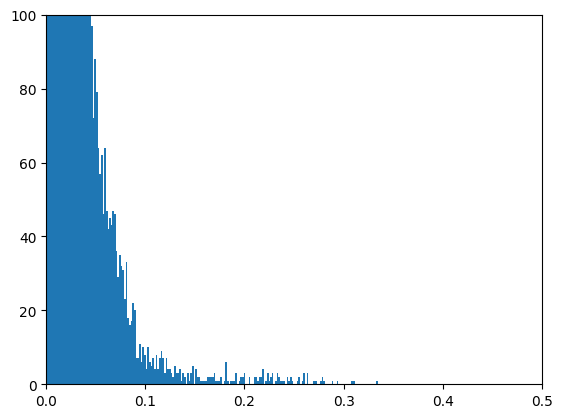

In [78]:
plt.hist(unthresh_adj_mtx.flatten(), bins=200)
plt.xlim((0, 0.5))
plt.ylim((0, 100))

In [38]:
# threshold searching from dcdfg code
from tqdm import tqdm

def _is_acyclic(adjacency):
    """
    Return true if adjacency is a acyclic
    :param np.ndarray adjacency: adjacency matrix
    """
    prod = np.eye(adjacency.shape[0], dtype=adjacency.dtype)
    for _ in range(1, adjacency.shape[0] + 1):
        prod = adjacency @ prod
        if np.trace(prod) != 0:
            return False
    return True


def is_acyclic(adjacency):
    return _is_acyclic(adjacency.astype(float))


def samesign(a, b):
    return a * b > 0


def bisect(func, low, high, T=20):
    "Find root of continuous function where f(low) and f(high) have opposite signs"
    flow = func(low)
    fhigh = func(high)
    assert not samesign(flow, fhigh)
    for i in tqdm(range(T), desc="bisecting"):
        midpoint = (low + high) / 2.0
        fmid = func(midpoint)
        if samesign(flow, fmid):
            low = midpoint
            flow = fmid
        else:
            high = midpoint
            fhigh = fmid
    # after all those iterations, low has one sign, and high another one. midpoint is unknown
    return high


def threshold(adj_mtx):
    # Final thresholding of all edges until DAG is found
    with torch.no_grad():
        def acyc(t):
            return (
                float(
                    is_acyclic(
                        adj_mtx > t
                    )
                )
                - 0.5
            )

        threshold = bisect(acyc, 0, 1)
    return threshold

In [39]:
t = threshold(unthresh_adj_mtx)

bisecting: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.76it/s]


In [40]:
t # min threshold for dag

0.06893730163574219

In [106]:
(unthresh_adj_mtx > t).sum()

633

In [139]:
(unthresh_adj_mtx > 3e-2).sum()

3042

In [192]:
thresh_adj_mtx = (unthresh_adj_mtx > 3e-2).astype(int)

In [193]:
np.unique(thresh_adj_mtx.sum(axis=1))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 32, 35, 39, 60, 63])

(array([110., 150.,   0.,  58.,  57.,   0.,  38.,  41.,   0.,  21.,   0.,
         24.,  15.,   0.,  17.,   8.,   0.,  12.,   0.,   6.,   7.,   0.,
          3.,   7.,   0.,   5.,   7.,   0.,   3.,   0.,   3.,   3.,   0.,
          0.,   3.,   0.,   2.,   0.,   4.,   3.,   0.,   2.,   3.,   0.,
          1.,   0.,   4.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([ 0.  ,  0.63,  1.26,  1.89,  2.52,  3.15,  3.78,  4.41,  5.04,
         5.67,  6.3 ,  6.93,  7.56,  8.19,  8.82,  9.45, 10.08, 10.71,
        11.34, 11.97, 12.6 , 13.23, 13.86, 14.49, 15.12, 15.75, 16.38,
        17.01, 17.64, 18.27, 18.9 , 19.53, 20.16, 20.79, 21.42, 22.05,
        22.68, 23.31, 23.94, 24.57

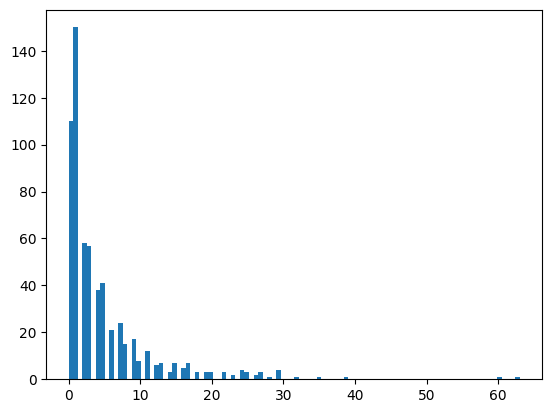

In [194]:
# dist of num of children
plt.hist(thresh_adj_mtx.sum(axis=1), bins=100)

In [195]:
w_children_idxs = np.where(thresh_adj_mtx.sum(axis=1) > 0)[0]
w_children_cts = thresh_adj_mtx.sum(axis=1)[w_children_idxs]
w_children_names = X_df.columns[w_children_cts]
w_children_df = pd.DataFrame(w_children_cts, index=w_children_names, columns=["count"])
w_children_df = w_children_df.sort_values("count", ascending=False)
w_children_df.head()

,count
ENSG00000143977,63
ENSG00000115484,60
ENSG00000143314,39
ENSG00000160803,35
ENSG00000143624,32


(array([516.,  11.,  19.,  14.,  10.,  10.,   2.,   3.,   3.,   4.,   4.,
          3.,   4.,   1.,   5.,   4.,   1.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  0.  ,   3.03,   6.06,   9.09,  12.12,  15.15,  18.18,  21.21,
         24.24,  27.27,  30.3 ,  33.33,  36.36,  39.39,  42.42,  45.45,
         48.48,  51.51,  54.54,  57.57,  60.6 ,  63.63,  66.66,  69.69,
         72.72,  75.75,  78.78,  81.81,  84.84,  87.87,  90.9 ,  93.93,
         96.96,  99.99, 103.02

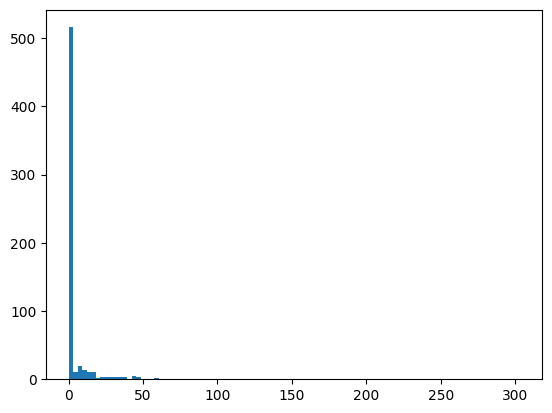

In [196]:
# dist num parents
plt.hist(thresh_adj_mtx.sum(axis=0), bins=100)

In [197]:
w_parents_idxs = np.where(thresh_adj_mtx.sum(axis=0) > 0)[0]
w_parents_cts = thresh_adj_mtx.sum(axis=0)[w_parents_idxs]
w_parents_names = X_df.columns[w_parents_cts]
w_parents_df = pd.DataFrame(w_parents_cts, index=w_parents_names, columns=["count"])
w_parents_df = w_parents_df.sort_values("count", ascending=False)
w_parents_df.head()

,count
ENSG00000197771,303
ENSG00000161057,241
ENSG00000112651,201
ENSG00000175792,112
ENSG00000163634,103


513


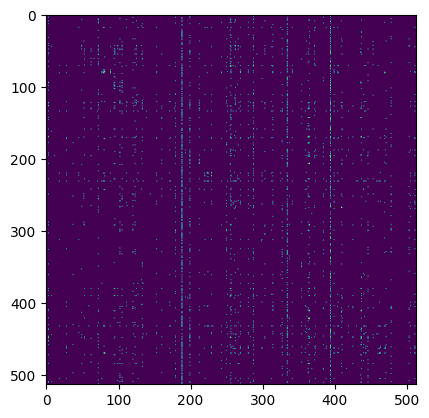

In [198]:
keep_idxs = np.where((thresh_adj_mtx.sum(axis=0) > 0) | (thresh_adj_mtx.sum(axis=1) > 0))[0]
print(len(keep_idxs))
sub_thresh_adj_mtx = thresh_adj_mtx[keep_idxs][:, keep_idxs]
plt.imshow(sub_thresh_adj_mtx)

/home/justinhong/miniconda3/envs/cp/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


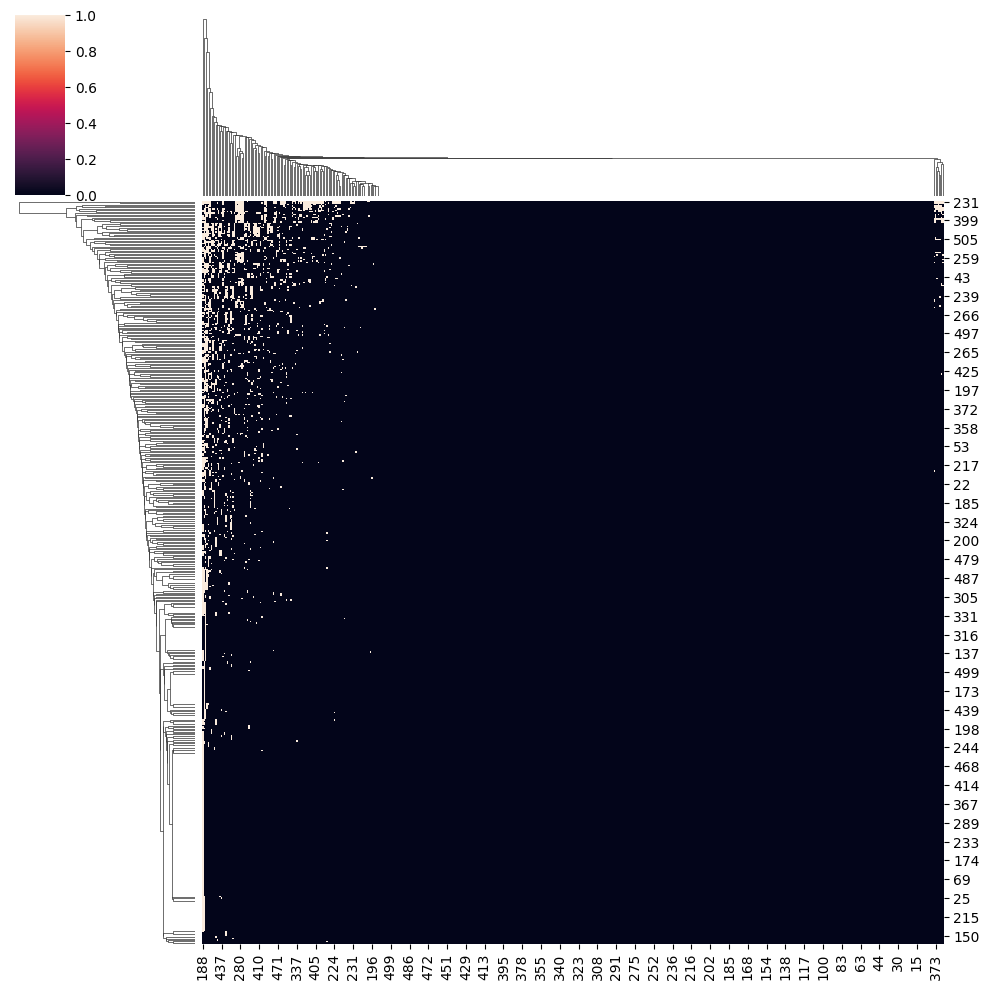

In [199]:
sns.clustermap(sub_thresh_adj_mtx)

In [200]:
# tf list from doi:10.1016/j.cell.2018.01.029
tf_list = """
ENSG00000137203
ENSG00000008196
ENSG00000087510
ENSG00000008197
ENSG00000116819
ENSG00000116017
ENSG00000179361
ENSG00000205143
ENSG00000196843
ENSG00000150347
ENSG00000117139
ENSG00000189079
ENSG00000153207
ENSG00000126705
ENSG00000106948
ENSG00000116539
ENSG00000173894
ENSG00000101457
ENSG00000104885
ENSG00000140632
ENSG00000137309
ENSG00000149948
ENSG00000025293
ENSG00000135365
ENSG00000126464
ENSG00000146285
ENSG00000152217
ENSG00000080603
ENSG00000188070
ENSG00000237765
ENSG00000141258
ENSG00000214717
ENSG00000177494
ENSG00000132846
ENSG00000100426
ENSG00000236287
ENSG00000257315
ENSG00000232040
ENSG00000106546
ENSG00000063438
ENSG00000143437
ENSG00000172379
ENSG00000133794
ENSG00000029153
ENSG00000139352
ENSG00000183734
ENSG00000176009
ENSG00000187855
ENSG00000232237
ENSG00000172238
ENSG00000179774
ENSG00000168874
ENSG00000180535
ENSG00000205899
ENSG00000180828
ENSG00000125533
ENSG00000134107
ENSG00000123095
ENSG00000250709
ENSG00000134852
ENSG00000116016
ENSG00000146618
ENSG00000183733
ENSG00000113196
ENSG00000164107
ENSG00000187821
ENSG00000114315
ENSG00000069812
ENSG00000173673
ENSG00000188290
ENSG00000197921
ENSG00000144485
ENSG00000179111
ENSG00000164683
ENSG00000135547
ENSG00000163909
ENSG00000100644
ENSG00000124440
ENSG00000104903
ENSG00000125952
ENSG00000166823
ENSG00000188095
ENSG00000187098
ENSG00000108788
ENSG00000175727
ENSG00000009950
ENSG00000070444
ENSG00000178860
ENSG00000151379
ENSG00000059728
ENSG00000213347
ENSG00000123933
ENSG00000119950
ENSG00000136997
ENSG00000116990
ENSG00000134323
ENSG00000111049
ENSG00000111046
ENSG00000129152
ENSG00000122180
ENSG00000084676
ENSG00000140396
ENSG00000124151
ENSG00000162992
ENSG00000171532
ENSG00000123307
ENSG00000164600
ENSG00000181965
ENSG00000178403
ENSG00000122859
ENSG00000171786
ENSG00000177551
ENSG00000130751
ENSG00000170485
ENSG00000151322
ENSG00000174576
ENSG00000184221
ENSG00000205927
ENSG00000177468
ENSG00000168267
ENSG00000260428
ENSG00000112246
ENSG00000159263
ENSG00000165643
ENSG00000120669
ENSG00000072310
ENSG00000198911
ENSG00000162367
ENSG00000186051
ENSG00000140262
ENSG00000125878
ENSG00000118526
ENSG00000163792
ENSG00000261787
ENSG00000071564
ENSG00000196628
ENSG00000101190
ENSG00000090447
ENSG00000068323
ENSG00000112561
ENSG00000105967
ENSG00000122691
ENSG00000233608
ENSG00000158773
ENSG00000105698
ENSG00000176542
ENSG00000143157
ENSG00000267281
ENSG00000123268
ENSG00000115966
ENSG00000162772
ENSG00000128272
ENSG00000169136
ENSG00000118217
ENSG00000213676
ENSG00000170653
ENSG00000156273
ENSG00000112182
ENSG00000156127
ENSG00000168062
ENSG00000123685
ENSG00000245848
ENSG00000172216
ENSG00000221869
ENSG00000092067
ENSG00000153879
ENSG00000118260
ENSG00000107175
ENSG00000157613
ENSG00000182158
ENSG00000060566
ENSG00000143578
ENSG00000146592
ENSG00000111269
ENSG00000137504
ENSG00000095794
ENSG00000105516
ENSG00000175197
ENSG00000170345
ENSG00000125740
ENSG00000175592
ENSG00000075426
ENSG00000108924
ENSG00000140044
ENSG00000177606
ENSG00000171223
ENSG00000130522
ENSG00000178573
ENSG00000182759
ENSG00000204103
ENSG00000185022
ENSG00000197063
ENSG00000198517
ENSG00000123405
ENSG00000082641
ENSG00000116044
ENSG00000050344
ENSG00000165030
ENSG00000129535
ENSG00000167074
ENSG00000100219
ENSG00000267179
ENSG00000233757
ENSG00000264668
ENSG00000139154
ENSG00000105127
ENSG00000011243
ENSG00000163516
ENSG00000166454
ENSG00000119866
ENSG00000127152
ENSG00000113916
ENSG00000161940
ENSG00000169594
ENSG00000173068
ENSG00000130940
ENSG00000159588
ENSG00000198824
ENSG00000147183
ENSG00000102974
ENSG00000124092
ENSG00000011332
ENSG00000205683
ENSG00000134874
ENSG00000167967
ENSG00000102189
ENSG00000120738
ENSG00000122877
ENSG00000179388
ENSG00000135625
ENSG00000164334
ENSG00000128610
ENSG00000153266
ENSG00000179943
ENSG00000162676
ENSG00000165702
ENSG00000111087
ENSG00000074047
ENSG00000106571
ENSG00000250571
ENSG00000174332
ENSG00000126603
ENSG00000107249
ENSG00000122034
ENSG00000125812
ENSG00000177374
ENSG00000169635
ENSG00000172273
ENSG00000095951
ENSG00000010818
ENSG00000127124
ENSG00000181666
ENSG00000185811
ENSG00000030419
ENSG00000161405
ENSG00000123411
ENSG00000095574
ENSG00000173404
ENSG00000168348
ENSG00000153814
ENSG00000136504
ENSG00000176407
ENSG00000151657
ENSG00000105610
ENSG00000155090
ENSG00000172059
ENSG00000118922
ENSG00000169926
ENSG00000266265
ENSG00000163884
ENSG00000129911
ENSG00000171872
ENSG00000127528
ENSG00000109787
ENSG00000136826
ENSG00000102554
ENSG00000067082
ENSG00000118263
ENSG00000102349
ENSG00000119138
ENSG00000185513
ENSG00000198945
ENSG00000154655
ENSG00000103495
ENSG00000085276
ENSG00000188786
ENSG00000085274
ENSG00000196132
ENSG00000186487
ENSG00000099326
ENSG00000143867
ENSG00000164920
ENSG00000172818
ENSG00000125850
ENSG00000105261
ENSG00000198300
ENSG00000181690
ENSG00000118495
ENSG00000126003
ENSG00000057657
ENSG00000170325
ENSG00000130711
ENSG00000112238
ENSG00000147596
ENSG00000141956
ENSG00000142611
ENSG00000116731
ENSG00000110851
ENSG00000138738
ENSG00000061455
ENSG00000152784
ENSG00000164256
ENSG00000185238
ENSG00000146587
ENSG00000131381
ENSG00000214022
ENSG00000084093
ENSG00000117000
ENSG00000124782
ENSG00000103449
ENSG00000165821
ENSG00000256463
ENSG00000101115
ENSG00000261678
ENSG00000215397
ENSG00000125520
ENSG00000124216
ENSG00000019549
ENSG00000185669
ENSG00000185591
ENSG00000167182
ENSG00000172845
ENSG00000105866
ENSG00000204335
ENSG00000189120
ENSG00000170374
ENSG00000164651
ENSG00000217236
ENSG00000147488
ENSG00000135148
ENSG00000179981
ENSG00000182463
ENSG00000121297
ENSG00000136451
ENSG00000011451
ENSG00000184937
ENSG00000100811
ENSG00000230797
ENSG00000126804
ENSG00000205189
ENSG00000066422
ENSG00000204366
ENSG00000198081
ENSG00000109906
ENSG00000116809
ENSG00000179456
ENSG00000181472
ENSG00000181722
ENSG00000173276
ENSG00000236104
ENSG00000089775
ENSG00000171448
ENSG00000185670
ENSG00000011590
ENSG00000177485
ENSG00000177125
ENSG00000185278
ENSG00000177311
ENSG00000166860
ENSG00000174282
ENSG00000184677
ENSG00000177888
ENSG00000179627
ENSG00000169155
ENSG00000196323
ENSG00000119574
ENSG00000130584
ENSG00000114853
ENSG00000204859
ENSG00000168826
ENSG00000168795
ENSG00000186130
ENSG00000178951
ENSG00000160685
ENSG00000184828
ENSG00000160062
ENSG00000273274
ENSG00000213588
ENSG00000066827
ENSG00000184517
ENSG00000142065
ENSG00000198939
ENSG00000196867
ENSG00000180787
ENSG00000120784
ENSG00000136866
ENSG00000181638
ENSG00000179059
ENSG00000204644
ENSG00000196670
ENSG00000020256
ENSG00000187815
ENSG00000187801
ENSG00000181007
ENSG00000184939
ENSG00000186660
ENSG00000189420
ENSG00000179588
ENSG00000169946
ENSG00000005889
ENSG00000067646
ENSG00000152977
ENSG00000043355
ENSG00000156925
ENSG00000174963
ENSG00000139800
ENSG00000171649
ENSG00000269699
ENSG00000141946
ENSG00000106261
ENSG00000155592
ENSG00000189298
ENSG00000187626
ENSG00000196652
ENSG00000196345
ENSG00000198315
ENSG00000166432
ENSG00000165061
ENSG00000256223
ENSG00000197020
ENSG00000181896
ENSG00000196247
ENSG00000062370
ENSG00000178150
ENSG00000152926
ENSG00000164631
ENSG00000197961
ENSG00000196418
ENSG00000172262
ENSG00000131849
ENSG00000125846
ENSG00000213762
ENSG00000176293
ENSG00000196646
ENSG00000197008
ENSG00000105708
ENSG00000196387
ENSG00000131127
ENSG00000115568
ENSG00000166478
ENSG00000167635
ENSG00000163848
ENSG00000179909
ENSG00000204920
ENSG00000147117
ENSG00000170631
ENSG00000170949
ENSG00000197279
ENSG00000175787
ENSG00000186272
ENSG00000103343
ENSG00000105497
ENSG00000188629
ENSG00000154957
ENSG00000167384
ENSG00000197841
ENSG00000147118
ENSG00000096654
ENSG00000136870
ENSG00000157429
ENSG00000005801
ENSG00000186448
ENSG00000275111
ENSG00000132010
ENSG00000010539
ENSG00000166261
ENSG00000122386
ENSG00000010244
ENSG00000160321
ENSG00000121417
ENSG00000170260
ENSG00000085644
ENSG00000149050
ENSG00000149054
ENSG00000171940
ENSG00000165804
ENSG00000165512
ENSG00000159905
ENSG00000159885
ENSG00000178386
ENSG00000267680
ENSG00000256294
ENSG00000167380
ENSG00000131115
ENSG00000278318
ENSG00000167377
ENSG00000159882
ENSG00000167840
ENSG00000159915
ENSG00000263002
ENSG00000159917
ENSG00000130856
ENSG00000196793
ENSG00000172466
ENSG00000198105
ENSG00000175395
ENSG00000196150
ENSG00000198169
ENSG00000256771
ENSG00000213096
ENSG00000152454
ENSG00000197134
ENSG00000198393
ENSG00000254004
ENSG00000006194
ENSG00000083844
ENSG00000174652
ENSG00000185947
ENSG00000090612
ENSG00000198039
ENSG00000171606
ENSG00000063587
ENSG00000158805
ENSG00000198538
ENSG00000169548
ENSG00000275004
ENSG00000056277
ENSG00000137871
ENSG00000162702
ENSG00000170265
ENSG00000167637
ENSG00000186026
ENSG00000267508
ENSG00000187607
ENSG00000249459
ENSG00000141040
ENSG00000188994
ENSG00000170684
ENSG00000166526
ENSG00000168661
ENSG00000145908
ENSG00000089335
ENSG00000131845
ENSG00000197935
ENSG00000205903
ENSG00000130803
ENSG00000171467
ENSG00000166188
ENSG00000169740
ENSG00000182986
ENSG00000181315
ENSG00000083812
ENSG00000249471
ENSG00000162664
ENSG00000181894
ENSG00000130844
ENSG00000160961
ENSG00000198185
ENSG00000198026
ENSG00000130684
ENSG00000189180
ENSG00000196693
ENSG00000196378
ENSG00000131061
ENSG00000088876
ENSG00000251247
ENSG00000113761
ENSG00000197937
ENSG00000169981
ENSG00000256683
ENSG00000169131
ENSG00000178338
ENSG00000177932
ENSG00000198816
ENSG00000160094
ENSG00000138311
ENSG00000178175
ENSG00000165244
ENSG00000075407
ENSG00000161298
ENSG00000188283
ENSG00000126746
ENSG00000161642
ENSG00000144331
ENSG00000187595
ENSG00000151789
ENSG00000124613
ENSG00000160908
ENSG00000186918
ENSG00000186496
ENSG00000186812
ENSG00000197024
ENSG00000176222
ENSG00000215421
ENSG00000175213
ENSG00000147124
ENSG00000119725
ENSG00000133250
ENSG00000170954
ENSG00000083817
ENSG00000173480
ENSG00000196724
ENSG00000105136
ENSG00000197050
ENSG00000102935
ENSG00000204947
ENSG00000130818
ENSG00000131116
ENSG00000197013
ENSG00000198521
ENSG00000118620
ENSG00000196705
ENSG00000256087
ENSG00000197647
ENSG00000125945
ENSG00000183621
ENSG00000171291
ENSG00000197857
ENSG00000171295
ENSG00000197044
ENSG00000198342
ENSG00000180855
ENSG00000167685
ENSG00000185219
ENSG00000083838
ENSG00000173275
ENSG00000124459
ENSG00000112200
ENSG00000178187
ENSG00000197714
ENSG00000197808
ENSG00000148143
ENSG00000181444
ENSG00000204604
ENSG00000225614
ENSG00000197016
ENSG00000196263
ENSG00000142528
ENSG00000164185
ENSG00000185177
ENSG00000180035
ENSG00000198464
ENSG00000173258
ENSG00000127081
ENSG00000198298
ENSG00000256229
ENSG00000243660
ENSG00000265763
ENSG00000188033
ENSG00000177599
ENSG00000229676
ENSG00000196268
ENSG00000162714
ENSG00000174586
ENSG00000103199
ENSG00000186446
ENSG00000196653
ENSG00000165655
ENSG00000081665
ENSG00000168813
ENSG00000081386
ENSG00000198546
ENSG00000196700
ENSG00000163795
ENSG00000144026
ENSG00000101493
ENSG00000197363
ENSG00000177853
ENSG00000178163
ENSG00000175322
ENSG00000198795
ENSG00000203326
ENSG00000167625
ENSG00000189164
ENSG00000167555
ENSG00000186020
ENSG00000183647
ENSG00000074657
ENSG00000198633
ENSG00000198597
ENSG00000171817
ENSG00000178229
ENSG00000198131
ENSG00000187187
ENSG00000152433
ENSG00000188785
ENSG00000121406
ENSG00000251369
ENSG00000204519
ENSG00000178935
ENSG00000172006
ENSG00000186300
ENSG00000172000
ENSG00000130544
ENSG00000167785
ENSG00000188321
ENSG00000198028
ENSG00000171469
ENSG00000171466
ENSG00000188868
ENSG00000249709
ENSG00000196357
ENSG00000186017
ENSG00000189042
ENSG00000198453
ENSG00000196437
ENSG00000171970
ENSG00000171827
ENSG00000180479
ENSG00000180938
ENSG00000189144
ENSG00000105732
ENSG00000176472
ENSG00000124444
ENSG00000161551
ENSG00000258405
ENSG00000218891
ENSG00000213015
ENSG00000171425
ENSG00000018869
ENSG00000198440
ENSG00000171574
ENSG00000196967
ENSG00000245680
ENSG00000083828
ENSG00000198466
ENSG00000269343
ENSG00000164048
ENSG00000166716
ENSG00000180626
ENSG00000272602
ENSG00000172748
ENSG00000167981
ENSG00000167962
ENSG00000153896
ENSG00000189190
ENSG00000196458
ENSG00000166704
ENSG00000198182
ENSG00000168916
ENSG00000180357
ENSG00000167554
ENSG00000213020
ENSG00000176024
ENSG00000142556
ENSG00000197619
ENSG00000204611
ENSG00000157657
ENSG00000177873
ENSG00000177842
ENSG00000172888
ENSG00000183309
ENSG00000197566
ENSG00000257591
ENSG00000188171
ENSG00000198551
ENSG00000197483
ENSG00000102870
ENSG00000221994
ENSG00000121864
ENSG00000167528
ENSG00000122482
ENSG00000175809
ENSG00000167395
ENSG00000179930
ENSG00000198093
ENSG00000198740
ENSG00000175105
ENSG00000197343
ENSG00000274349
ENSG00000160229
ENSG00000144792
ENSG00000182983
ENSG00000179195
ENSG00000197497
ENSG00000198046
ENSG00000167394
ENSG00000188295
ENSG00000277462
ENSG00000083814
ENSG00000171161
ENSG00000251192
ENSG00000197372
ENSG00000196109
ENSG00000197928
ENSG00000181450
ENSG00000197123
ENSG00000173041
ENSG00000196172
ENSG00000197124
ENSG00000176083
ENSG00000117010
ENSG00000143373
ENSG00000229809
ENSG00000156853
ENSG00000198429
ENSG00000164011
ENSG00000171163
ENSG00000197472
ENSG00000185730
ENSG00000143067
ENSG00000196110
ENSG00000147789
ENSG00000187792
ENSG00000196757
ENSG00000167562
ENSG00000183779
ENSG00000164684
ENSG00000196946
ENSG00000215356
ENSG00000215343
ENSG00000214534
ENSG00000215372
ENSG00000120963
ENSG00000181135
ENSG00000182141
ENSG00000242852
ENSG00000197951
ENSG00000140548
ENSG00000147180
ENSG00000178665
ENSG00000160352
ENSG00000182111
ENSG00000227124
ENSG00000250312
ENSG00000182903
ENSG00000196081
ENSG00000213967
ENSG00000214652
ENSG00000269067
ENSG00000196350
ENSG00000183850
ENSG00000186777
ENSG00000223614
ENSG00000234444
ENSG00000237440
ENSG00000185252
ENSG00000139651
ENSG00000181220
ENSG00000169955
ENSG00000186230
ENSG00000141579
ENSG00000162086
ENSG00000186376
ENSG00000065029
ENSG00000160336
ENSG00000197054
ENSG00000169951
ENSG00000196417
ENSG00000196214
ENSG00000169957
ENSG00000175691
ENSG00000198146
ENSG00000179965
ENSG00000197128
ENSG00000152439
ENSG00000196391
ENSG00000196456
ENSG00000152443
ENSG00000196453
ENSG00000170100
ENSG00000197782
ENSG00000128000
ENSG00000196381
ENSG00000196597
ENSG00000204946
ENSG00000179922
ENSG00000197162
ENSG00000197362
ENSG00000142409
ENSG00000214189
ENSG00000198556
ENSG00000196152
ENSG00000197863
ENSG00000173875
ENSG00000180884
ENSG00000188227
ENSG00000196466
ENSG00000278129
ENSG00000174255
ENSG00000048405
ENSG00000170396
ENSG00000182348
ENSG00000204524
ENSG00000198482
ENSG00000197779
ENSG00000198346
ENSG00000204514
ENSG00000180257
ENSG00000102984
ENSG00000197933
ENSG00000151612
ENSG00000185869
ENSG00000167766
ENSG00000198783
ENSG00000124203
ENSG00000127903
ENSG00000196267
ENSG00000152475
ENSG00000198040
ENSG00000197608
ENSG00000176723
ENSG00000223547
ENSG00000213799
ENSG00000196605
ENSG00000105750
ENSG00000267041
ENSG00000178917
ENSG00000236609
ENSG00000197385
ENSG00000261221
ENSG00000257446
ENSG00000234284
ENSG00000221923
ENSG00000228623
ENSG00000213793
ENSG00000214029
ENSG00000213988
ENSG00000167232
ENSG00000146757
ENSG00000184635
ENSG00000197360
ENSG00000213973
ENSG00000152467
ENSG00000130182
ENSG00000158691
ENSG00000196812
ENSG00000121413
ENSG00000176371
ENSG00000121903
ENSG00000166529
ENSG00000182318
ENSG00000187987
ENSG00000197037
ENSG00000197062
ENSG00000140265
ENSG00000186814
ENSG00000235109
ENSG00000140987
ENSG00000180532
ENSG00000131848
ENSG00000197213
ENSG00000204532
ENSG00000137185
ENSG00000153975
ENSG00000198205
ENSG00000198455
ENSG00000070476
ENSG00000100105
ENSG00000112365
ENSG00000171443
ENSG00000161914
ENSG00000198839
ENSG00000243943
ENSG00000148516
ENSG00000169554
ENSG00000140836
ENSG00000091656
ENSG00000124496
ENSG00000118156
ENSG00000001167
ENSG00000139793
ENSG00000144161
ENSG00000197114
ENSG00000125817
ENSG00000177946
ENSG00000234616
ENSG00000183340
ENSG00000221944
ENSG00000180346
ENSG00000173825
ENSG00000169989
ENSG00000179886
ENSG00000164296
ENSG00000140993
ENSG00000171735
ENSG00000108509
ENSG00000131914
ENSG00000187772
ENSG00000065978
ENSG00000006047
ENSG00000060138
ENSG00000168214
ENSG00000124232
ENSG00000257923
ENSG00000111249
ENSG00000169856
ENSG00000119547
ENSG00000205922
ENSG00000182568
ENSG00000119042
ENSG00000154832
ENSG00000168772
ENSG00000171604
ENSG00000130816
ENSG00000099364
ENSG00000173120
ENSG00000089094
ENSG00000138336
ENSG00000187605
ENSG00000118058
ENSG00000272333
ENSG00000137090
ENSG00000173253
ENSG00000064218
ENSG00000176399
ENSG00000142700
ENSG00000143006
ENSG00000142025
ENSG00000101412
ENSG00000007968
ENSG00000112242
ENSG00000205250
ENSG00000133740
ENSG00000169016
ENSG00000165891
ENSG00000129173
ENSG00000198176
ENSG00000114126
ENSG00000183434
ENSG00000164330
ENSG00000221818
ENSG00000108001
ENSG00000088881
ENSG00000135373
ENSG00000120690
ENSG00000109381
ENSG00000102034
ENSG00000135374
ENSG00000126767
ENSG00000111145
ENSG00000158711
ENSG00000105722
ENSG00000157554
ENSG00000134954
ENSG00000157557
ENSG00000006468
ENSG00000105672
ENSG00000117036
ENSG00000253831
ENSG00000175832
ENSG00000244405
ENSG00000139083
ENSG00000010030
ENSG00000163497
ENSG00000151702
ENSG00000154727
ENSG00000124664
ENSG00000066336
ENSG00000269404
ENSG00000166211
ENSG00000163435
ENSG00000059122
ENSG00000129514
ENSG00000125798
ENSG00000170608
ENSG00000171956
ENSG00000204612
ENSG00000054598
ENSG00000176692
ENSG00000251493
ENSG00000186564
ENSG00000187140
ENSG00000170122
ENSG00000184492
ENSG00000187559
ENSG00000184659
ENSG00000204779
ENSG00000273514
ENSG00000178919
ENSG00000186790
ENSG00000103241
ENSG00000137273
ENSG00000176165
ENSG00000160973
ENSG00000168269
ENSG00000186766
ENSG00000214336
ENSG00000129654
ENSG00000065970
ENSG00000198815
ENSG00000164916
ENSG00000141568
ENSG00000176678
ENSG00000183770
ENSG00000111206
ENSG00000109101
ENSG00000170802
ENSG00000053254
ENSG00000139445
ENSG00000150907
ENSG00000118689
ENSG00000184481
ENSG00000204060
ENSG00000114861
ENSG00000128573
ENSG00000049768
ENSG00000137166
ENSG00000164379
ENSG00000176302
ENSG00000189299
ENSG00000179772
ENSG00000102145
ENSG00000179348
ENSG00000107485
ENSG00000136574
ENSG00000130700
ENSG00000141448
ENSG00000167491
ENSG00000143614
ENSG00000104447
ENSG00000220201
ENSG00000137270
ENSG00000124827
ENSG00000134317
ENSG00000083307
ENSG00000158055
ENSG00000135457
ENSG00000115112
ENSG00000153560
ENSG00000263001
ENSG00000006704
ENSG00000196275
ENSG00000174428
ENSG00000114439
ENSG00000079432
ENSG00000105856
ENSG00000140382
ENSG00000064961
ENSG00000118418
ENSG00000138795
ENSG00000182968
ENSG00000100146
ENSG00000176887
ENSG00000177732
ENSG00000143842
ENSG00000168875
ENSG00000129194
ENSG00000164736
ENSG00000203883
ENSG00000181449
ENSG00000125285
ENSG00000134595
ENSG00000039600
ENSG00000124766
ENSG00000134532
ENSG00000110693
ENSG00000171056
ENSG00000005513
ENSG00000125398
ENSG00000184895
ENSG00000081059
ENSG00000152284
ENSG00000148737
ENSG00000101126
ENSG00000101544
ENSG00000180318
ENSG00000156150
ENSG00000052850
ENSG00000227059
ENSG00000186103
ENSG00000004848
ENSG00000125492
ENSG00000143032
ENSG00000131668
ENSG00000043039
ENSG00000188909
ENSG00000113722
ENSG00000165556
ENSG00000131264
ENSG00000105392
ENSG00000109851
ENSG00000185610
ENSG00000144355
ENSG00000115844
ENSG00000064195
ENSG00000108813
ENSG00000105880
ENSG00000006377
ENSG00000197587
ENSG00000204595
ENSG00000165606
DUX1_HUMAN
DUX3_HUMAN
ENSG00000260596
ENSG00000258873
ENSG00000135638
ENSG00000170370
ENSG00000163064
ENSG00000164778
ENSG00000123576
ENSG00000106038
ENSG00000174279
ENSG00000164900
ENSG00000168505
ENSG00000133937
ENSG00000063515
ENSG00000169840
ENSG00000180613
ENSG00000165259
ENSG00000163666
ENSG00000152804
ENSG00000136630
ENSG00000147421
ENSG00000215612
ENSG00000188816
ENSG00000188620
ENSG00000135100
ENSG00000275410
ENSG00000215271
ENSG00000105991
ENSG00000253293
ENSG00000005073
ENSG00000106031
ENSG00000105996
ENSG00000105997
ENSG00000197576
ENSG00000106004
ENSG00000106006
ENSG00000122592
ENSG00000078399
ENSG00000120094
ENSG00000159184
ENSG00000173917
ENSG00000120093
ENSG00000182742
ENSG00000120075
ENSG00000108511
ENSG00000260027
ENSG00000120068
ENSG00000170689
ENSG00000180818
ENSG00000123388
ENSG00000123407
ENSG00000123364
ENSG00000198353
ENSG00000172789
ENSG00000197757
ENSG00000037965
ENSG00000180806
ENSG00000128645
ENSG00000128710
ENSG00000128713
ENSG00000170178
ENSG00000128714
ENSG00000128652
ENSG00000170166
ENSG00000175879
ENSG00000128709
ENSG00000170549
ENSG00000170561
ENSG00000177508
ENSG00000113430
ENSG00000176842
ENSG00000159387
ENSG00000016082
ENSG00000159556
ENSG00000175329
ENSG00000138136
ENSG00000179528
ENSG00000213921
ENSG00000273706
ENSG00000106689
ENSG00000107187
ENSG00000121454
ENSG00000089116
ENSG00000106852
ENSG00000162624
ENSG00000143355
ENSG00000162761
ENSG00000136944
ENSG00000143995
ENSG00000134138
ENSG00000105419
ENSG00000005102
ENSG00000106511
ENSG00000185155
ENSG00000150051
ENSG00000130675
ENSG00000163132
ENSG00000120149
ENSG00000111704
ENSG00000205857
ENSG00000255192
ENSG00000235608
ENSG00000229544
ENSG00000136352
ENSG00000125820
ENSG00000119919
ENSG00000125816
ENSG00000183072
ENSG00000180053
ENSG00000136327
ENSG00000167034
ENSG00000109705
ENSG00000163623
ENSG00000148826
ENSG00000165066
ENSG00000106410
ENSG00000214513
ENSG00000171540
ENSG00000115507
ENSG00000165588
ENSG00000185630
ENSG00000204304
ENSG00000167081
ENSG00000105717
ENSG00000139515
ENSG00000165462
ENSG00000109132
ENSG00000069011
ENSG00000164093
ENSG00000107859
ENSG00000160199
ENSG00000165495
ENSG00000175325
ENSG00000116132
ENSG00000167157
ENSG00000134438
ENSG00000173976
ENSG00000101883
ENSG00000131721
ENSG00000203989
ENSG00000274529
ENSG00000185960
ENSG00000168779
ENSG00000126778
ENSG00000170577
ENSG00000138083
ENSG00000100625
ENSG00000177045
ENSG00000184302
ENSG00000177426
ENSG00000118707
ENSG00000153779
ENSG00000176679
ENSG00000107807
ENSG00000115297
ENSG00000164438
ENSG00000178928
ENSG00000164853
ENSG00000148704
ENSG00000116035
ENSG00000151650
ENSG00000100987
ENSG00000119614
ENSG00000136367
ENSG00000165156
ENSG00000178764
ENSG00000174306
ENSG00000075891
ENSG00000135903
ENSG00000106331
ENSG00000007372
ENSG00000009709
ENSG00000064835
ENSG00000143190
ENSG00000028277
ENSG00000137709
ENSG00000185668
ENSG00000184486
ENSG00000198914
ENSG00000196767
ENSG00000152192
ENSG00000151615
ENSG00000091010
ENSG00000204531
ENSG00000212993
ENSG00000248483
ENSG00000184271
ENSG00000106536
ENSG00000185122
ENSG00000025156
ENSG00000102878
ENSG00000176160
ENSG00000171116
ENSG00000268738
ENSG00000172468
ENSG00000169953
ENSG00000125347
ENSG00000168310
ENSG00000126456
ENSG00000137265
ENSG00000128604
ENSG00000117595
ENSG00000185507
ENSG00000140968
ENSG00000213928
ENSG00000188981
ENSG00000066697
ENSG00000171169
ENSG00000064489
ENSG00000068305
ENSG00000213999
ENSG00000081189
ENSG00000116604
ENSG00000112658
ENSG00000123636
ENSG00000134046
ENSG00000071655
ENSG00000129071
ENSG00000166987
ENSG00000127445
ENSG00000143379
ENSG00000136169
ENSG00000076108
ENSG00000169057
ENSG00000141644
ENSG00000127989
ENSG00000120832
ENSG00000156469
ENSG00000122085
ENSG00000096401
ENSG00000135164
ENSG00000170903
ENSG00000118513
ENSG00000185697
ENSG00000101057
ENSG00000176182
ENSG00000162601
ENSG00000165684
ENSG00000249961
ENSG00000147601
ENSG00000132604
ENSG00000125482
ENSG00000036549
ENSG00000124920
ENSG00000166268
ENSG00000086102
ENSG00000170448
ENSG00000169083
ENSG00000091831
ENSG00000140009
ENSG00000173153
ENSG00000119715
ENSG00000196482
ENSG00000101076
ENSG00000164749
ENSG00000169297
ENSG00000126368
ENSG00000174738
ENSG00000131408
ENSG00000025434
ENSG00000012504
ENSG00000144852
ENSG00000143257
ENSG00000120798
ENSG00000177463
ENSG00000112333
ENSG00000278570
ENSG00000175745
ENSG00000185551
ENSG00000160113
ENSG00000113580
ENSG00000151623
ENSG00000123358
ENSG00000153234
ENSG00000119508
ENSG00000136931
ENSG00000116833
ENSG00000148200
ENSG00000082175
ENSG00000186951
ENSG00000112033
ENSG00000132170
ENSG00000131759
ENSG00000077092
ENSG00000172819
ENSG00000069667
ENSG00000198963
ENSG00000143365
ENSG00000186350
ENSG00000204231
ENSG00000143171
ENSG00000126351
ENSG00000151090
ENSG00000111424
ENSG00000106624
ENSG00000160007
ENSG00000171634
ENSG00000104221
ENSG00000138380
ENSG00000132024
ENSG00000115816
ENSG00000115163
ENSG00000175279
ENSG00000102901
ENSG00000169689
ENSG00000163320
ENSG00000106554
ENSG00000214575
ENSG00000144655
ENSG00000110925
ENSG00000178662
ENSG00000276644
ENSG00000126733
ENSG00000117505
ENSG00000175550
ENSG00000198715
ENSG00000062194
ENSG00000159592
ENSG00000137947
ENSG00000115041
ENSG00000012223
ENSG00000143033
ENSG00000148411
ENSG00000230257
ENSG00000120837
ENSG00000066136
ENSG00000186416
ENSG00000243678
ENSG00000106459
ENSG00000170515
ENSG00000277258
ENSG00000156374
ENSG00000112511
ENSG00000119403
ENSG00000188313
ENSG00000110777
ENSG00000138073
ENSG00000185129
ENSG00000146676
ENSG00000172733
ENSG00000166349
ENSG00000125826
ENSG00000148300
ENSG00000160633
ENSG00000130254
ENSG00000010803
ENSG00000157933
ENSG00000136603
ENSG00000188779
ENSG00000185420
ENSG00000104976
ENSG00000174446
ENSG00000159140
ENSG00000065526
ENSG00000164299
ENSG00000100207
ENSG00000168769
ENSG00000151500
ENSG00000144747
ENSG00000197579
ENSG00000102804
ENSG00000136936
ENSG00000141510
ENSG00000073282
ENSG00000078900
ENSG00000125813
ENSG00000196092
ENSG00000125618
ENSG00000198807
ENSG00000196233
ENSG00000178177
ENSG00000117707
ENSG00000119608
ENSG00000102908
ENSG00000131196
ENSG00000101096
ENSG00000072736
ENSG00000100968
ENSG00000109320
ENSG00000077150
ENSG00000162924
ENSG00000173039
ENSG00000104856
ENSG00000132005
ENSG00000087903
ENSG00000080298
ENSG00000111783
ENSG00000143390
ENSG00000185002
ENSG00000181827
ENSG00000196460
ENSG00000159216
ENSG00000124813
ENSG00000020633
ENSG00000160224
ENSG00000177030
ENSG00000162419
ENSG00000101216
ENSG00000215474
ENSG00000067066
ENSG00000135899
ENSG00000079263
ENSG00000185404
ENSG00000162599
ENSG00000147862
ENSG00000141905
ENSG00000008441
ENSG00000170365
ENSG00000166949
ENSG00000141646
ENSG00000113658
ENSG00000120693
ENSG00000115415
ENSG00000170581
ENSG00000168610
ENSG00000138378
ENSG00000126561
ENSG00000173757
ENSG00000166888
ENSG00000163508
ENSG00000174197
ENSG00000164458
ENSG00000136535
ENSG00000184058
ENSG00000167800
ENSG00000092607
ENSG00000112837
ENSG00000143178
ENSG00000121068
ENSG00000164532
ENSG00000073861
ENSG00000122145
ENSG00000135111
ENSG00000121075
ENSG00000089225
ENSG00000149922
ENSG00000112592
ENSG00000028839
ENSG00000182521
ENSG00000189308
ENSG00000187079
ENSG00000074219
ENSG00000007866
ENSG00000197905
ENSG00000131931
ENSG00000129028
ENSG00000168286
ENSG00000137492
ENSG00000173451
ENSG00000041988
ENSG00000176946
ENSG00000177683
ENSG00000174796
ENSG00000184436
ENSG00000161277
ENSG00000168152
""".split()
tf_list[:5]

['ENSG00000137203',
 'ENSG00000008196',
 'ENSG00000087510',
 'ENSG00000008197',
 'ENSG00000116819']

In [201]:
gene_names = X_df.columns[:-1].tolist()
tf_idxs = []
for tf in tf_list:
    try:
        idx = gene_names.index(tf)
    except ValueError:
        continue
    tf_idxs.append(idx)
tf_idxs

[52,
 409,
 559,
 440,
 340,
 288,
 0,
 482,
 580,
 553,
 517,
 535,
 394,
 30,
 21,
 325,
 589,
 220,
 139,
 251]

In [202]:
children_total = unthresh_adj_mtx.sum(axis=1)
tf_df = pd.DataFrame(children_total, index=gene_names, columns=["total"])
tf_df["is_tf"] = 0
tf_df["is_tf"][tf_idxs] = 1
tf_df["thresh_total"] = thresh_adj_mtx.sum(axis=1)

/tmp/ipykernel_1568/943780533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_df["is_tf"][tf_idxs] = 1


<Axes: xlabel='total', ylabel='Count'>

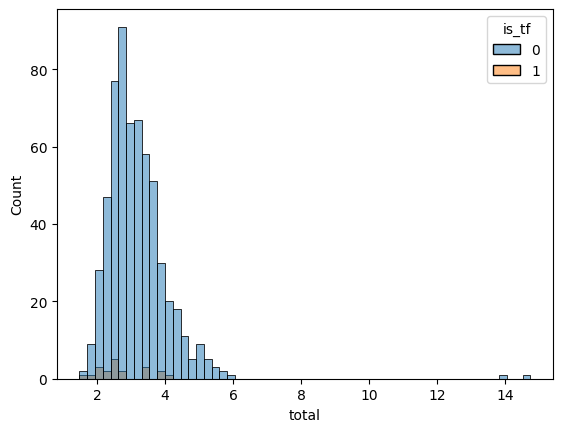

In [203]:
import seaborn as sns

sns.histplot(tf_df, x="total", hue="is_tf")

<Axes: xlabel='thresh_total', ylabel='Count'>

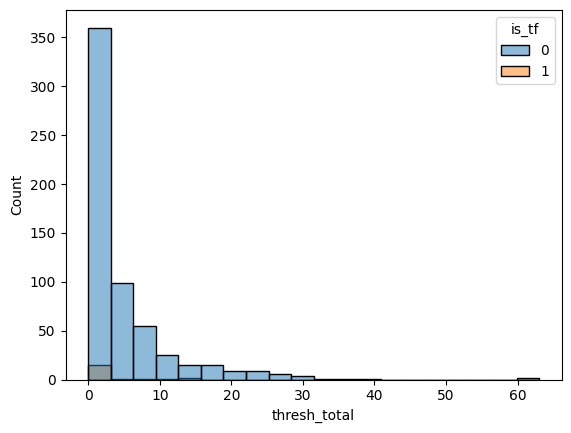

In [204]:
sns.histplot(tf_df, x="thresh_total", hue="is_tf", bins=20)

In [205]:
tf_df[tf_df["is_tf"] == 1]

,total,is_tf,thresh_total
ENSG00000116809,1.962813,1,0
ENSG00000117505,2.644097,1,0
ENSG00000143379,2.086178,1,0
ENSG00000153207,3.964300,1,15
ENSG00000189308,2.370691,1,0
ENSG00000112592,2.427796,1,1
ENSG00000131931,2.416172,1,1
ENSG00000151657,2.659223,1,1
ENSG00000175550,3.492540,1,4
ENSG00000172273,1.868065,1,1


In [206]:
# TFDP1
tfdp1_idx = gene_names.index("ENSG00000198176")
tfdp1_children_idxs = np.where(thresh_adj_mtx[tfdp1_idx] == 1)[0]
tfdp1_children = (np.array(gene_names)[tfdp1_children_idxs])
tfdp1_children

array(['ENSG00000115053', 'ENSG00000113810', 'ENSG00000114867',
       'ENSG00000164109', 'ENSG00000112118', 'ENSG00000166197',
       'ENSG00000109971', 'ENSG00000092199', 'ENSG00000161981',
       'ENSG00000074071', 'ENSG00000131153', 'ENSG00000130816',
       'ENSG00000072501'], dtype='<U15')

In [207]:
thresh_adj_mtx.sum(axis=0)[tfdp1_children_idxs]

array([ 60,  46,  44,  32,  51,  46, 103, 201,  38,  34,  28,  34,  25])

In [208]:
# not TFDP1
tfdp1_idx = gene_names.index("ENSG00000153207")
tfdp1_children_idxs = np.where(thresh_adj_mtx[tfdp1_idx] == 1)[0]
tfdp1_children = (np.array(gene_names)[tfdp1_children_idxs])
tfdp1_children


array(['ENSG00000116560', 'ENSG00000082898', 'ENSG00000115053',
       'ENSG00000163714', 'ENSG00000114867', 'ENSG00000164163',
       'ENSG00000166197', 'ENSG00000110321', 'ENSG00000175216',
       'ENSG00000109971', 'ENSG00000092199', 'ENSG00000171490',
       'ENSG00000108561', 'ENSG00000108424', 'ENSG00000072501'],
      dtype='<U15')

In [209]:
thresh_adj_mtx.sum(axis=0)[tfdp1_children_idxs]

array([  5,  12,  60,  10,  44,  17,  46,  32,  13, 103, 201,  30, 241,
        22,  25])

In [210]:
# not TFDP1
tfdp1_idx = gene_names.index("ENSG00000159140")
tfdp1_children_idxs = np.where(thresh_adj_mtx[tfdp1_idx] == 1)[0]
tfdp1_children = (np.array(gene_names)[tfdp1_children_idxs])
tfdp1_children

array(['ENSG00000112118', 'ENSG00000112306', 'ENSG00000197958',
       'ENSG00000120699', 'ENSG00000092199', 'ENSG00000161981',
       'ENSG00000167978', 'ENSG00000131153', 'ENSG00000108654',
       'ENSG00000099800', 'ENSG00000088325'], dtype='<U15')

In [211]:
thresh_adj_mtx.sum(axis=0)[tfdp1_children_idxs]

array([ 51, 303,  13,  46, 201,  38,   4,  28,   2,  46,  44])